In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from collections import Counter
import spacy
from nltk.tokenize import sent_tokenize
from urllib.request import urlopen
import cairocffi as cairo
import igraph as ig


# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

# Q1.1
## Calculate Transfers
In order to calculate how many masters have moved to a certain federation, I grouped and counted them. The count numbers were shown as a result in the data frame and I decided to pick the Transfer Date column to obtain the numbers. The result was a pandas series but I turned it into a proper pandas data frame with index and topics(Federations, Transfers). Now df is data frame that shows how many times masters have transfered to certain federations.

In [8]:
b=chess.groupby(["Federation"]).count()['Transfer Date']

In [9]:
df=pd.DataFrame({'Federations':b.index, 'Transfers':b.values})
df

,Federations,Transfers
0,AHO,5
1,ALB,1
2,ALG,1
3,AND,11
4,ARG,1
...,...,...
100,USA,89
101,VEN,5
102,VIE,1
103,WLS,8


# Q1.2
## Sorting
I sorted the data frame by transfers, numbers going from high to low by using **.sort_values**

In [10]:
df=df.sort_values(by=['Transfers'], ascending=False)
df

,Federations,Transfers
100,USA,89
34,GER,55
17,CAN,44
29,ESP,41
82,RUS,36
...,...,...
24,DOM,1
69,MYA,1
79,QAT,1
78,PUR,1


# Q1.3
## Top 10 as Bar Chart
The x-axis (feds) valus are top 10 federation names from the data frame, constructed as a list. The y-axis values are the top 10 transfer numbers.

With **plt.bar** created the bar chart.

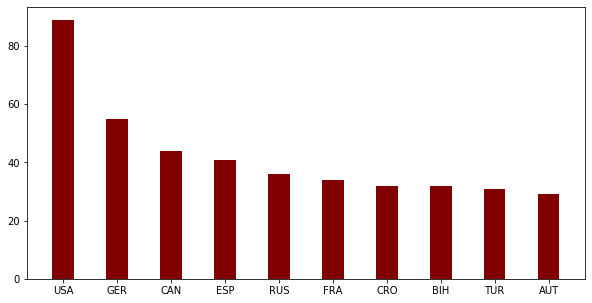

In [12]:
feds = list(df['Federations'].head(10))
numbers = list(df['Transfers'].head(10))
  
fig = plt.figure(figsize = (10, 5))

plt.bar(feds, numbers, color ='maroon',width = 0.4);

# Q1.4
## Constructing a Dictionary
Now I need to create a dictionary with (A,B) pairs as keys and numbers as values. A represent the former federation and B represents the transfered federation. The numbers are how many times that transferation from A to B happened.
I zip the federation names and count them. pairs_count is my dictionary.

In [8]:
pairs_count=Counter([(x,y) for x,y in zip(chess['Form.Fed'],chess['Federation'])])
pairs_count

Counter({('PHI', 'USA'): 6,
         ('CRO', 'BIH'): 8,
         ('YUG', 'BIH'): 2,
         ('HON', 'ESA'): 2,
         ('ISR', 'AUT'): 2,
         ('CAN', 'AUS'): 2,
         ('YUG', 'CAN'): 4,
         ('AZE', 'USA'): 3,
         ('ENG', 'CAN'): 2,
         ('GER', 'ITA'): 3,
         ('ESP', 'PAR'): 2,
         ('GEO', 'USA'): 4,
         ('GER', 'SUI'): 9,
         ('BEL', 'YUG'): 2,
         ('CRO', 'CHI'): 2,
         ('RUS', 'UKR'): 10,
         ('LBN', 'SVK'): 2,
         ('UZB', 'RUS'): 4,
         ('RUS', 'USA'): 7,
         ('AUT', 'SUI'): 2,
         ('ARM', 'USA'): 8,
         ('UKR', 'BUL'): 2,
         ('MNC', 'FRA'): 2,
         ('FRA', 'ESP'): 2,
         ('RUS', 'GER'): 16,
         ('CAN', 'YUG'): 4,
         ('ROM', 'ESP'): 2,
         ('ENG', 'JCI'): 2,
         ('CAN', 'ROM'): 2,
         ('BUL', 'MKD'): 2,
         ('ESP', 'HON'): 2,
         ('SVK', 'CAN'): 2,
         ('IRL', 'ENG'): 2,
         ('YUG', 'SVK'): 2,
         ('BIH', 'GER'): 4,
         ('USA', '

# Q1.5
## Filtering
After counting the pairs and creating a dictionary, I filter it by values greater than or equal to 5. 

In [9]:
pairs = pairs_count.items()
filtered_dictionary = {key: value for key, value in pairs if value >=5}

filtered_dictionary

{('PHI', 'USA'): 6,
 ('CRO', 'BIH'): 8,
 ('GER', 'SUI'): 9,
 ('RUS', 'UKR'): 10,
 ('RUS', 'USA'): 7,
 ('ARM', 'USA'): 8,
 ('RUS', 'GER'): 16,
 ('USA', 'CAN'): 5,
 ('UKR', 'USA'): 7,
 ('ISR', 'CAN'): 7,
 ('RUS', 'ISR'): 5,
 ('CUB', 'USA'): 7,
 ('CUB', 'ESP'): 7,
 ('ESP', 'AND'): 7,
 ('RUS', 'CZE'): 8,
 ('GER', 'LIE'): 5,
 ('UKR', 'GER'): 12,
 ('ARG', 'ESP'): 5,
 ('SCG', 'CRO'): 10,
 ('SVK', 'CZE'): 8,
 ('BIH', 'CRO'): 8,
 ('UKR', 'RUS'): 14,
 ('SRB', 'CRO'): 6,
 ('CHN', 'SIN'): 5,
 ('ENG', 'WLS'): 7,
 ('SRB', 'BIH'): 18,
 ('IND', 'USA'): 11,
 ('ROU', 'FRA'): 8,
 ('FRA', 'MNC'): 17,
 ('AZE', 'TUR'): 8,
 ('HUN', 'AUT'): 5,
 ('SYR', 'FIN'): 6}

# Q1.6 & Q1.7
## Directed networkx Graph
By using **nx.DiGraph()** I create a directed networkx graph and get the edges from my filtered dictionary. The transfer from A to B is shown with arrows in the graph.

with **nx.draw** and **plt.show** I display the graph

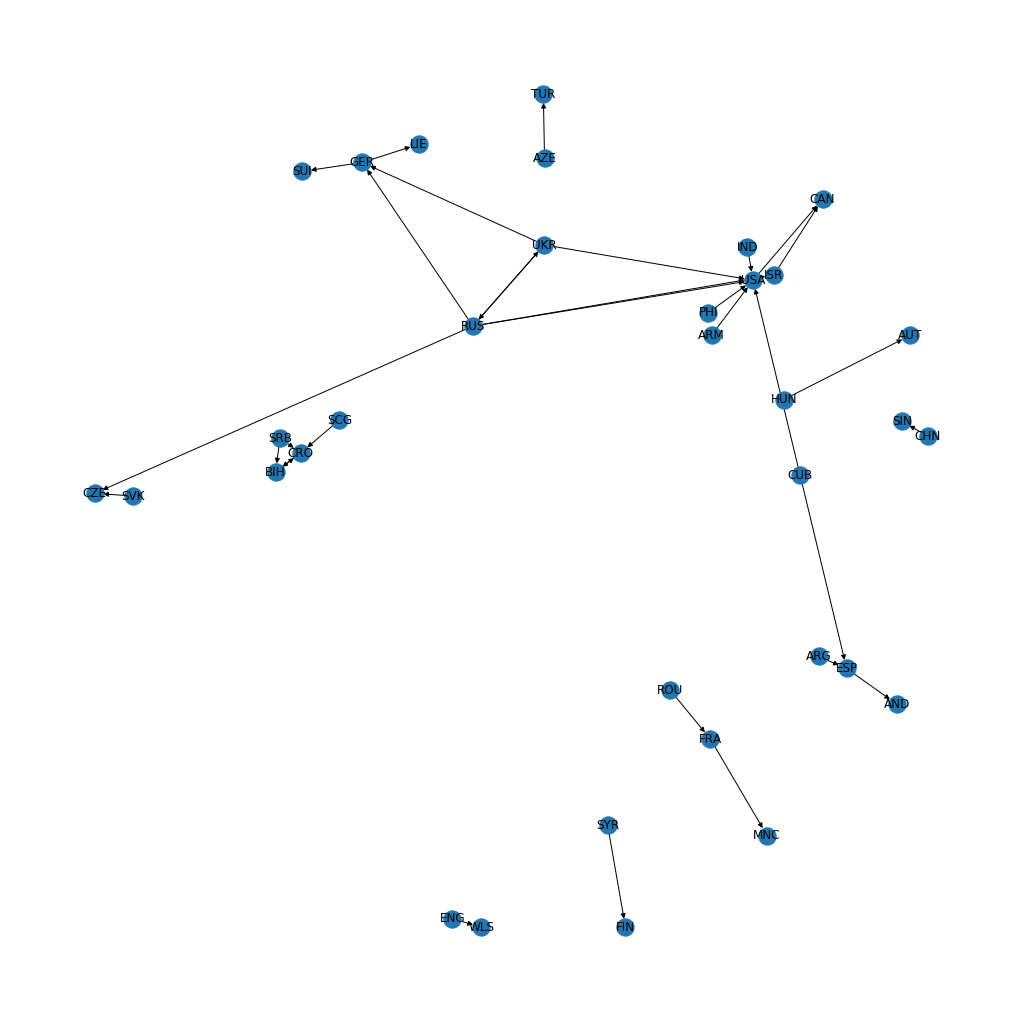

In [12]:
plt.rcParams['figure.figsize'] = 14,14
G = nx.DiGraph()
G.add_edges_from(filtered_dictionary)

nx.draw(G, with_labels=True)
plt.show()

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [3]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA;

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

Later on I will be working on only specific parts of the NBA data so I am using .loc to select columns by name.

In [2]:
data=NBA.loc[:,['PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME']]
data

,PLAYER1_ID,PLAYER1_NAME,PLAYER2_ID,PLAYER2_NAME,PLAYER3_ID,PLAYER3_NAME
0,0,NaN,0,NaN,0,NaN
1,1629028,Deandre Ayton,202702,Kenneth Faried,1629059,Elie Okobo
2,1628367,Josh Jackson,201935,James Harden,0,NaN
3,201935,James Harden,0,NaN,0,NaN
4,1628969,Mikal Bridges,201935,James Harden,0,NaN
...,...,...,...,...,...,...
582463,1610612739,NaN,0,NaN,0,NaN
582464,1627790,Ante Zizic,203903,Jordan Clarkson,0,NaN
582465,203917,Nik Stauskas,0,NaN,0,NaN
582466,1628467,Maxi Kleber,0,NaN,0,NaN


# Q2.1
## Players in Interaction
First, by using **.dropna** I got rid of rows that are in player name columns and are NaN. Choosing how as 'all' dropped rows which have all the values as NA. This allowed me to work with a much clearer data which has no empty rows.

Then, in order to see the games that are played by 3 players, I chose how as 'any' and subset as all player name columns, so that I can gain 3 player interactions from the data frame I cleaned previously. Now, player1_2_3 is a data frame whose player names columns are all full. I reset the index so that the order is neat.

Then, I moved onto 2 player interactions and did the same procedure for both player1&2 and player1&3 interactions. First, I drop the NAs on player1 and player3 columns. After this I have a data frame like this: player1 and player 3 columns never have value NA, player 2 column sometimes has value NA. player1_3 dataf frame secretly contains player1_2_3 dataframe (player1&2&3 columns have no value NA) so in order to get rid of that and have ONLY player 1&3 interactions, I used **.isna** on column player2, to select NAs. Now player1_3 data frame is a data frame like this: player1&3 have no value NA, all the values on player2 are NA.

I repeated the procedure for player1&2 interactions.

I printed player1_3 to check if my coding is right

In [3]:
extractempty=data.dropna(subset=['PLAYER1_NAME','PLAYER2_NAME','PLAYER3_NAME'],how='all')

player1_2_3=extractempty.dropna(subset=['PLAYER1_NAME','PLAYER2_NAME','PLAYER3_NAME'],how='any')
player1_2_3.reset_index(drop=True,inplace=True)

player1_3=extractempty.dropna(subset=['PLAYER1_NAME','PLAYER3_NAME'],how='any')
player1_3=player1_3[player1_3['PLAYER2_NAME'].isna()]
player1_3.reset_index(drop=True,inplace=True)

player1_2=extractempty.dropna(subset=['PLAYER1_NAME','PLAYER2_NAME'],how='any')
player1_2=player1_2[player1_2['PLAYER3_NAME'].isna()]
player1_2.reset_index(drop=True,inplace=True)

print(player1_3.to_string())


       PLAYER1_ID              PLAYER1_NAME  PLAYER2_ID PLAYER2_NAME  PLAYER3_ID              PLAYER3_NAME
0          101123              Gerald Green           0          NaN     1626162           Kelly Oubre Jr.
1         1629059                Elie Okobo           0          NaN      202702            Kenneth Faried
2         1626164              Devin Booker           0          NaN      201935              James Harden
3          202685         Jonas Valanciunas           0          NaN      203497               Rudy Gobert
4          204060                Joe Ingles           0          NaN      203200            Justin Holiday
5          202718          Chandler Parsons           0          NaN      203497               Rudy Gobert
6         1626153              Delon Wright           0          NaN      200757           Thabo Sefolosha
7          202324            Derrick Favors           0          NaN      101139                  CJ Miles
8         1626153              Delon 

I created 3 seperate lists (for interaction types such as player1&2&3 player1&3 and player1&2 by appending them like a pair (a,b) as I go through the interactions and merged them together at the end.

In [4]:
list1=list()
list2=list()
list3=list()
for i in range(len(player1_2_3)):
    list1.append((player1_2_3['PLAYER1_NAME'][i],player1_2_3['PLAYER2_NAME'][i]))
    list1.append((player1_2_3['PLAYER1_NAME'][i],player1_2_3['PLAYER3_NAME'][i]))
    list1.append((player1_2_3['PLAYER2_NAME'][i],player1_2_3['PLAYER3_NAME'][i]))
    
for n in range(len(player1_3)):
    list2.append((player1_3['PLAYER1_NAME'][n],player1_3['PLAYER3_NAME'][n]))
    
for k in range(len(player1_2)):
    list2.append((player1_2['PLAYER1_NAME'][k],player1_2['PLAYER2_NAME'][k]))
    
playerlist=list1+list2+list3

# Q2.2
## Constructing a Dictionary
In order to count how many times a pair has interacted I used counter from collections. At the end I gained a dictionary which has keys as player pairs and values as interaction number 

In [5]:
count=Counter([(x,y) for x,y in playerlist])
count

Counter({('Deandre Ayton', 'Kenneth Faried'): 1,
         ('Deandre Ayton', 'Elie Okobo'): 22,
         ('Kenneth Faried', 'Elie Okobo'): 1,
         ('Devin Booker', 'PJ Tucker'): 2,
         ('Devin Booker', 'Elie Okobo'): 27,
         ('PJ Tucker', 'Elie Okobo'): 1,
         ('Jonas Valanciunas', 'Rudy Gobert'): 6,
         ('Jonas Valanciunas', 'Justin Holiday'): 8,
         ('Rudy Gobert', 'Justin Holiday'): 1,
         ('Noah Vonleh', 'DeAndre Jordan'): 4,
         ('Noah Vonleh', 'Dennis Smith Jr.'): 12,
         ('DeAndre Jordan', 'Dennis Smith Jr.'): 59,
         ('Enes Kanter', 'Maxi Kleber'): 2,
         ('Enes Kanter', 'Mario Hezonja'): 16,
         ('Maxi Kleber', 'Mario Hezonja'): 2,
         ('Rudy Gobert', 'Jakob Poeltl'): 4,
         ('Rudy Gobert', 'Derrick Favors'): 155,
         ('Jakob Poeltl', 'Derrick Favors'): 2,
         ('Deandre Ayton', 'Jonas Valanciunas'): 6,
         ('Deandre Ayton', 'Dragan Bender'): 21,
         ('Jonas Valanciunas', 'Dragan Bender'): 5

# Q2.3
## Filtering 
I filtered the dictionary by checking the interaction number which are the values of the dictionary

In [6]:
pairs = count.items()
filtered_dictionary = {key: value for key, value in pairs if value >=75}

filtered_dictionary

{('Rudy Gobert', 'Derrick Favors'): 155,
 ('Kevin Durant', 'Draymond Green'): 103,
 ('Myles Turner', 'Darren Collison'): 148,
 ('Steven Adams', 'Paul George'): 79,
 ('Jamal Murray', 'Monte Morris'): 122,
 ('Steven Adams', 'Russell Westbrook'): 223,
 ('DeAndre Jordan', 'Luka Doncic'): 88,
 ('Willie Cauley-Stein', "De'Aaron Fox"): 173,
 ('Jusuf Nurkic', 'Damian Lillard'): 185,
 ('Nikola Vucevic', 'Aaron Gordon'): 120,
 ('Andre Drummond', 'Blake Griffin'): 118,
 ('Joel Embiid', 'Ben Simmons'): 132,
 ('Rudy Gobert', 'Donovan Mitchell'): 77,
 ('Rudy Gobert', 'Ricky Rubio'): 108,
 ('Andre Drummond', 'Reggie Jackson'): 112,
 ('Jerami Grant', 'Russell Westbrook'): 175,
 ('Brook Lopez', 'Giannis Antetokounmpo'): 140,
 ('Al Horford', 'Kyrie Irving'): 147,
 ('Klay Thompson', 'Draymond Green'): 138,
 ('Anthony Davis', 'Jrue Holiday'): 136,
 ('Marcus Morris', 'Kyrie Irving'): 89,
 ('Thomas Bryant', 'Bradley Beal'): 82,
 ('Jarrett Allen', "D'Angelo Russell"): 159,
 ('Kevin Durant', 'Stephen Curry'):

# Q2.4 Constructing ig.Graph
I am converting my filtered dictionary to a filtered list in order to create edges comfortably.

In [29]:
filtered_list = list(filtered_dictionary.items())
filtered_list

[(('Rudy Gobert', 'Derrick Favors'), 155),
 (('Kevin Durant', 'Draymond Green'), 103),
 (('Myles Turner', 'Darren Collison'), 148),
 (('Steven Adams', 'Paul George'), 79),
 (('Jamal Murray', 'Monte Morris'), 122),
 (('Steven Adams', 'Russell Westbrook'), 223),
 (('DeAndre Jordan', 'Luka Doncic'), 88),
 (('Willie Cauley-Stein', "De'Aaron Fox"), 173),
 (('Jusuf Nurkic', 'Damian Lillard'), 185),
 (('Nikola Vucevic', 'Aaron Gordon'), 120),
 (('Andre Drummond', 'Blake Griffin'), 118),
 (('Joel Embiid', 'Ben Simmons'), 132),
 (('Rudy Gobert', 'Donovan Mitchell'), 77),
 (('Rudy Gobert', 'Ricky Rubio'), 108),
 (('Andre Drummond', 'Reggie Jackson'), 112),
 (('Jerami Grant', 'Russell Westbrook'), 175),
 (('Brook Lopez', 'Giannis Antetokounmpo'), 140),
 (('Al Horford', 'Kyrie Irving'), 147),
 (('Klay Thompson', 'Draymond Green'), 138),
 (('Anthony Davis', 'Jrue Holiday'), 136),
 (('Marcus Morris', 'Kyrie Irving'), 89),
 (('Thomas Bryant', 'Bradley Beal'), 82),
 (('Jarrett Allen', "D'Angelo Russel

Here I am going through values in the list and adding them to a new list called lst. At the end I have all the names seperated from pairs.

In [10]:
lst=[]
edge=[]
tpl=()
for x,y in filtered_list:
    lst.append(x[0]) 
    lst.append(x[1])
    tpl=(x[0],x[1])
    edge.append(tpl)
mylist = list(dict.fromkeys(lst))
mylist

['Rudy Gobert',
 'Derrick Favors',
 'Kevin Durant',
 'Draymond Green',
 'Myles Turner',
 'Darren Collison',
 'Steven Adams',
 'Paul George',
 'Jamal Murray',
 'Monte Morris',
 'Russell Westbrook',
 'DeAndre Jordan',
 'Luka Doncic',
 'Willie Cauley-Stein',
 "De'Aaron Fox",
 'Jusuf Nurkic',
 'Damian Lillard',
 'Nikola Vucevic',
 'Aaron Gordon',
 'Andre Drummond',
 'Blake Griffin',
 'Joel Embiid',
 'Ben Simmons',
 'Donovan Mitchell',
 'Ricky Rubio',
 'Reggie Jackson',
 'Jerami Grant',
 'Brook Lopez',
 'Giannis Antetokounmpo',
 'Al Horford',
 'Kyrie Irving',
 'Klay Thompson',
 'Anthony Davis',
 'Jrue Holiday',
 'Marcus Morris',
 'Thomas Bryant',
 'Bradley Beal',
 'Jarrett Allen',
 "D'Angelo Russell",
 'Stephen Curry',
 'JaVale McGee',
 'LeBron James',
 'Mason Plumlee',
 'Nikola Jokic',
 'Clint Capela',
 'Chris Paul',
 'JJ Redick',
 'Marcus Smart',
 'LaMarcus Aldridge',
 'DeMar DeRozan',
 'Jakob Poeltl',
 'Rudy Gay',
 'Davis Bertans',
 'Dewayne Dedmon',
 'Trae Young',
 'Marvin Williams',
 '

The edges of the ig graph will be name pairs

In [11]:
edge

[('Rudy Gobert', 'Derrick Favors'),
 ('Kevin Durant', 'Draymond Green'),
 ('Myles Turner', 'Darren Collison'),
 ('Steven Adams', 'Paul George'),
 ('Jamal Murray', 'Monte Morris'),
 ('Steven Adams', 'Russell Westbrook'),
 ('DeAndre Jordan', 'Luka Doncic'),
 ('Willie Cauley-Stein', "De'Aaron Fox"),
 ('Jusuf Nurkic', 'Damian Lillard'),
 ('Nikola Vucevic', 'Aaron Gordon'),
 ('Andre Drummond', 'Blake Griffin'),
 ('Joel Embiid', 'Ben Simmons'),
 ('Rudy Gobert', 'Donovan Mitchell'),
 ('Rudy Gobert', 'Ricky Rubio'),
 ('Andre Drummond', 'Reggie Jackson'),
 ('Jerami Grant', 'Russell Westbrook'),
 ('Brook Lopez', 'Giannis Antetokounmpo'),
 ('Al Horford', 'Kyrie Irving'),
 ('Klay Thompson', 'Draymond Green'),
 ('Anthony Davis', 'Jrue Holiday'),
 ('Marcus Morris', 'Kyrie Irving'),
 ('Thomas Bryant', 'Bradley Beal'),
 ('Jarrett Allen', "D'Angelo Russell"),
 ('Kevin Durant', 'Stephen Curry'),
 ('JaVale McGee', 'LeBron James'),
 ('Mason Plumlee', 'Nikola Jokic'),
 ('Clint Capela', 'Chris Paul'),
 ('JJ

Now it is time to construct the graph, the vertices are obtained from **my list**, which are names and edges are obtained from **edge** which are names paired.

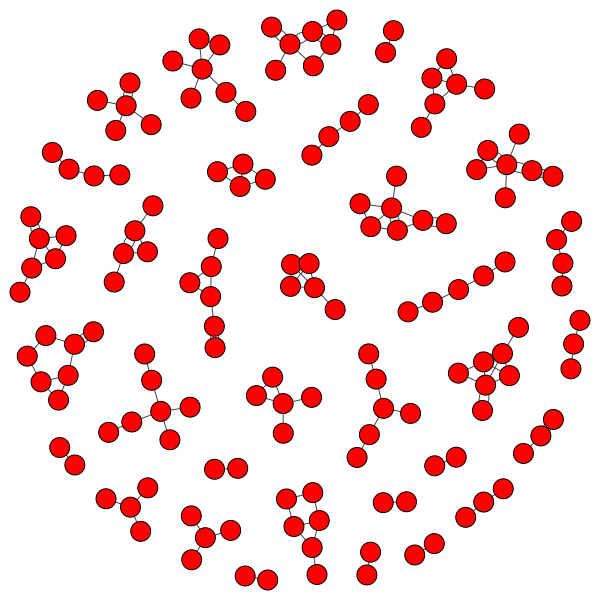

In [12]:
G2 = ig.Graph()
G2.add_vertices(mylist)
G2.add_edges(edge)
G.vs['label'] = mylist
ig.plot(G2)

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [4]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [5]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

# Q3.1
## Splitting the Text
I used **sent_tokenize** from NLTK in order to split the text into sentences

In [9]:
sentences=sent_tokenize(greatExpectations)
sentences

['\r\n\r\nMy father’s family name being Pirrip, and my Christian name Philip, my\r\ninfant tongue could make of both names nothing longer or more explicit\r\nthan Pip.',
 'So, I called myself Pip, and came to be called Pip.',
 'I give Pirrip as my father’s family name, on the authority of his\r\ntombstone and my sister,—Mrs.',
 'Joe Gargery, who married the blacksmith.',
 'As I never saw my father or my mother, and never saw any likeness of\r\neither of them (for their days were long before the days of\r\nphotographs), my first fancies regarding what they were like were\r\nunreasonably derived from their tombstones.',
 'The shape of the letters on\r\nmy father’s, gave me an odd idea that he was a square, stout, dark man,\r\nwith curly black hair.',
 'From the character and turn of the inscription,\r\n“_Also Georgiana Wife of the Above_,” I drew a childish conclusion that\r\nmy mother was freckled and sickly.',
 'To five little stone lozenges, each\r\nabout a foot and a half long, which

# Q3.2
## List of Names
I used SpaCY's NER function. 

The outer for loop goes through the sentences one by one, the inner for loop checks the names in the sentences and if the there are names in that sentence categorized under PERSON then I append those names or name to an empty list. If the length of that list is 2, meaning if there are two names in that sentence, I am creating a pair of names and adding that pair to another list.

Now I have a list1 which consists of pairs of names that are in the same sentence.

In [10]:
NER = spacy.load("en_core_web_sm")

In [11]:
list1=list()
for i in range(len(sentences)):
    list2=list()
    snt=sentences[i]
    res=NER(snt)
    for ent in res.ents:
        if ent.label_ in ['PERSON']:
            list2.append(ent.text)
            if len(list2)==2:
                list1.append((list2[0],list2[1]))
                
list1

[('Philip Pirrip', 'Roger'),
 ('Joe Gargery,—wife', 'Joe Gargery'),
 ('Joe Gargery', 'Joe Gargery'),
 ('Joe', 'Joe'),
 ('Pip', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Pip'),
 ('flaxen curls', 'Joe'),
 ('Pip', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Wopsle', 'Hubble'),
 ('Joe', 'Joe'),
 ('Wopsle', 'bald forehead'),
 ('Amens', 'Wopsle'),
 ('Joe', 'Uncle Pumblechook'),
 ('Joe', 'Pum'),
 ('Hubble', 'Hubble,—I'),
 ('Wopsle', 'Richard'),
 ('Pumblechook', 'Hubble'),
 ('Hubble', 'Wopsle'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Uncle Pumblechook', 'Joe'),
 ('Hubble', 'Joe'),
 ('Joe', 'Joe'),
 ('Pumblechook', 'Joe'),
 ('Pumblechook', 'Mum'),
 ('Pumblechook', 'Joe'),
 ('Pumblechook', 'Hubble'),
 ('Joe', 'Joe'),
 ('Wopsle', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Joe'),
 ('Joe', 'Wopsle'),
 ('Joe', 'Joe'),
 ('Wopsle', 'Joe'),
 ('Pip', 'Joe'),
 ('Joe', 'Joe'),
 ('Wopsle', 'Joe'),
 ('Pumb

# Q3.3
## Constructing a Dictionary
With **Counter** from collections I am counting the pairs in the list. Now I have count which is a dictionary whose keys are name pairs and values are how many times that pair appeared in the list.

In [120]:
count=Counter([(x,y) for x,y in list1])

In [121]:
count

Counter({('Philip Pirrip', 'Roger'): 1,
         ('Joe Gargery,—wife', 'Joe Gargery'): 1,
         ('Joe Gargery', 'Joe Gargery'): 1,
         ('Joe', 'Joe'): 82,
         ('Pip', 'Joe'): 20,
         ('Joe', 'Pip'): 7,
         ('flaxen curls', 'Joe'): 1,
         ('Wopsle', 'Hubble'): 1,
         ('Wopsle', 'bald forehead'): 1,
         ('Amens', 'Wopsle'): 1,
         ('Joe', 'Uncle Pumblechook'): 3,
         ('Joe', 'Pum'): 1,
         ('Hubble', 'Hubble,—I'): 1,
         ('Wopsle', 'Richard'): 2,
         ('Pumblechook', 'Hubble'): 2,
         ('Hubble', 'Wopsle'): 1,
         ('Uncle Pumblechook', 'Joe'): 1,
         ('Hubble', 'Joe'): 1,
         ('Pumblechook', 'Joe'): 6,
         ('Pumblechook', 'Mum'): 1,
         ('Wopsle', 'Joe'): 5,
         ('Joe', 'Wopsle'): 4,
         ('Pumblechook', 'Pumblechook'): 5,
         ('Wopsle', 'Wopsle'): 4,
         ('Jo', 'Joe'): 1,
         ('Pip', 'Pip'): 3,
         ('Uncle Pumblechook’s', 'Joe'): 1,
         ('Havisham', 'Joe'): 6,
   

# Q3.4
## Filtering
I want to filter my dictionary by values and only take numbers greater than or equal to 3. filtered_dictionary is the filtered version which I have only picked values, numbers greater than or equal to 3 and their keys, name pairs.

In [122]:
pairs = count.items()
filtered_dictionary = {key: value for key, value in pairs if value >=3}

filtered_dictionary

{('Joe', 'Joe'): 82,
 ('Pip', 'Joe'): 20,
 ('Joe', 'Pip'): 7,
 ('Joe', 'Uncle Pumblechook'): 3,
 ('Pumblechook', 'Joe'): 6,
 ('Wopsle', 'Joe'): 5,
 ('Joe', 'Wopsle'): 4,
 ('Pumblechook', 'Pumblechook'): 5,
 ('Wopsle', 'Wopsle'): 4,
 ('Pip', 'Pip'): 3,
 ('Havisham', 'Joe'): 6,
 ('Havisham', 'Havisham'): 5,
 ('Joe', 'Pumblechook'): 4,
 ('Miss Havisham', 'Miss Havisham'): 3,
 ('Joe', 'Havisham'): 6,
 ('Miss Havisham', 'Pip'): 3,
 ('Jaggers', 'Joe'): 3,
 ('Jaggers', 'Jaggers'): 11,
 ('Joe', 'Biddy'): 4,
 ('Pumblechook', 'Joseph'): 4,
 ('Wemmick', 'Jaggers'): 10,
 ('Pocket', 'Pocket'): 6,
 ('Flopson', 'Pocket'): 3,
 ('Jane', 'Pocket'): 3,
 ('Herbert', 'Jaggers'): 3,
 ('Wemmick', 'Wemmick'): 16,
 ('Jaggers', 'Wemmick'): 9,
 ('Pip', 'Wemmick'): 10,
 ('Joe', 'Herbert'): 5,
 ('Handel', 'Herbert'): 5,
 ('Pip', 'Havisham'): 3,
 ('Herbert', 'Herbert'): 17,
 ('Wemmick', 'Pip'): 5,
 ('Pip', 'Jaggers'): 8,
 ('Spider', 'Jaggers'): 3,
 ('Provis', 'Herbert'): 5,
 ('Herbert', 'Provis'): 7,
 ('Tom', 'Jack

Here is the list version of the filteration

In [ ]:
filtered_list=list(filtered_dictionary.items())
filtered_list

# Q3.5 & Q3.6
## networkx Graph
I create the networkx graph by using **nx.Graph()** and getting the edges from the dictionary I filtered previously. 

Now nodes names and the connections represent if they are a pair or not.

I draw and display my graph by using **nx.draw** and **plt.show**

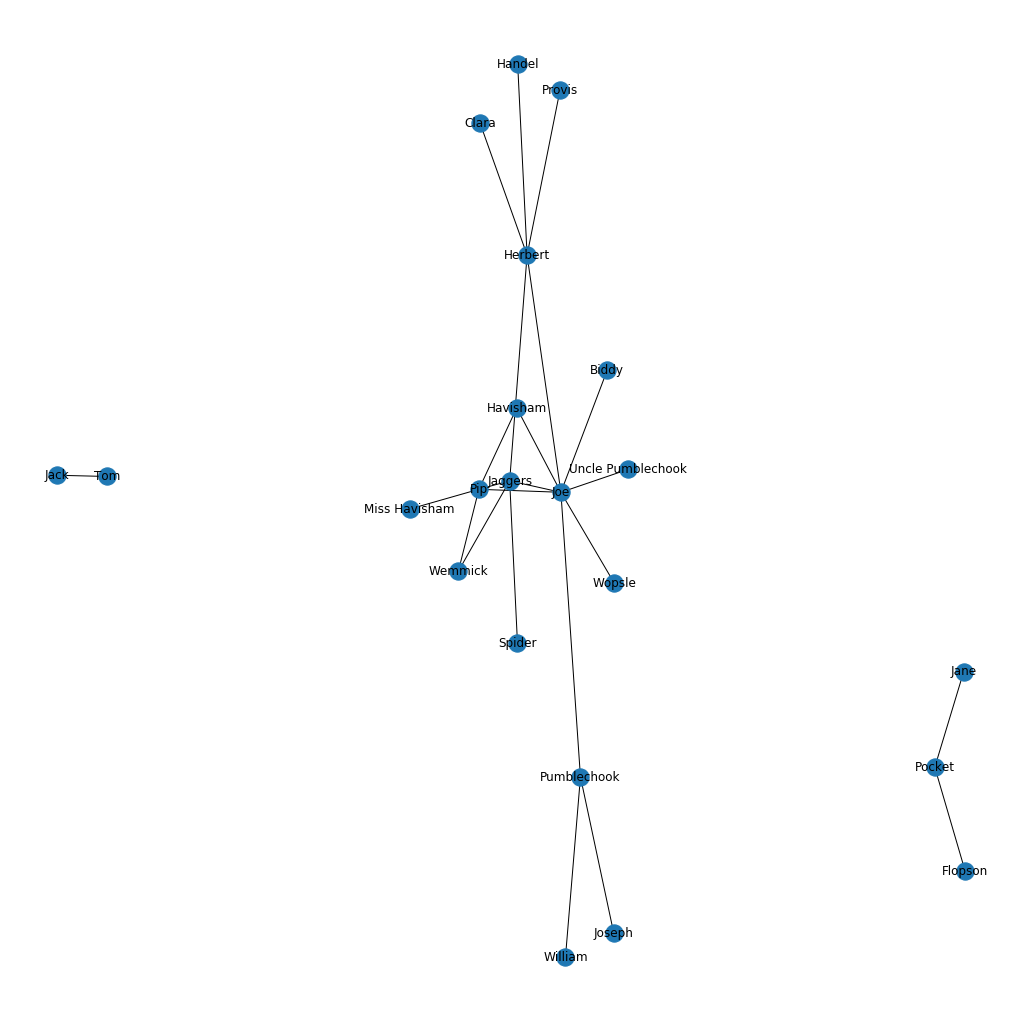

In [126]:
plt.rcParams['figure.figsize'] = 14,14
G = nx.Graph()
G.add_edges_from(filtered_dictionary)

nx.draw(G, with_labels=True)
plt.show()